# Conjuv Only

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '../data/public/'
VOCAB_FILE = DATA_PATH + 'vocabulario-controlado-basico-vcb-lista-alfabetica.txt'
BERT_RESULTS_FILE = DATA_PATH + 'results_TopicClassification_BERT_CosineSimilarity.csv'
TDIDF_RESULTS_FILE = DATA_PATH + 'results_TopicClassification_TFIDF_CosineSimilarity.csv'

### Get and Process the Controlled Vocabulary

In [18]:
def process_vocab_file(vocab_file):
    ROWS_TO_SKIP = 8
    vocab_dict = {}
    with open(vocab_file, 'r', encoding='utf-8') as file:
        current_term = ''
        for line in file.read().splitlines()[ROWS_TO_SKIP:]:
            if not line.startswith('\t') and line != '':
                current_term = line
                vocab_dict[current_term] = {
                    'USE': [], # Use
                    'DF': [],  # Definição
                    'UP': [],  # Termos não preferenciais
                    'TG': [],  # Termo geral
                    'TR': [],  # Termos relacionados
                    'TE': [],  # Termos específicos
                    'EQ': [],  # Equivalente
                    'Nota de escopo': [],
                }
            elif line != '':
                property = line.strip().split(':')
                key = property[0].strip()
                value = property[1].strip()
                vocab_dict[current_term][key].append(value)
    return vocab_dict
vocab_json = process_vocab_file(vocab_file=VOCAB_FILE)
vocab_json

{'2019-nCoV disease': {'USE': ['Covid-19'],
  'DF': [],
  'UP': [],
  'TG': [],
  'TR': [],
  'TE': [],
  'EQ': [],
  'Nota de escopo': []},
 '2FA': {'USE': ['Autenticação de dois fatores'],
  'DF': [],
  'UP': [],
  'TG': [],
  'TR': [],
  'TE': [],
  'EQ': [],
  'Nota de escopo': []},
 '2Factor Authentication': {'USE': ['Autenticação de dois fatores'],
  'DF': [],
  'UP': [],
  'TG': [],
  'TR': [],
  'TE': [],
  'EQ': [],
  'Nota de escopo': []},
 'AAE': {'USE': ['Avaliação ambiental estratégica'],
  'DF': [],
  'UP': [],
  'TG': [],
  'TR': [],
  'TE': [],
  'EQ': [],
  'Nota de escopo': []},
 'Ab-rogação': {'USE': [],
  'DF': ['É a revogação total de uma lei pela edição de uma nova. Lê-se lei em sentido amplo, abrangendo os decretos e demais regulamentos que também poderão sofrer ab-rogação. É também considerado o ato de tornar nulo ou sem efeito a norma jurídica anterior.$uhttps'],
  'UP': ['Revogação total'],
  'TG': ['Revogação de legislação'],
  'TR': ['Derrogação',
   'Irretr

### Get and Process results from Models

In [3]:
df_bert = pd.read_csv(BERT_RESULTS_FILE)
df_tfidf = pd.read_csv(TDIDF_RESULTS_FILE)

df_bert = df_bert[df_bert['participatory_space'] == 'assemblies|confjuv4|confjuv4']
df_tfidf = df_tfidf[df_tfidf['participatory_space'] == 'assemblies|confjuv4|confjuv4']

def process_topic(topic):
    cleaned_topic = topic.rsplit(" (", 1)[0]
    use_topic = vocab_json[cleaned_topic]['USE']
    if use_topic == []:
        return cleaned_topic
    return use_topic[0]

df_bert['Tópico 1'] = df_bert['Tópico 1'].apply(process_topic)
df_bert['Tópico 2'] = df_bert['Tópico 2'].apply(process_topic)
df_bert['Tópicos 1 e 2'] = df_bert['Tópico 1'] + ' | ' + df_bert['Tópico 2']

df_tfidf['Tópico 1'] = df_tfidf['Tópico 1'].apply(process_topic)
df_tfidf['Tópico 2'] = df_tfidf['Tópico 2'].apply(process_topic)
df_tfidf['Tópicos 1 e 2'] = df_tfidf['Tópico 1'] + ' | ' + df_tfidf['Tópico 2']

### Plots - BERT

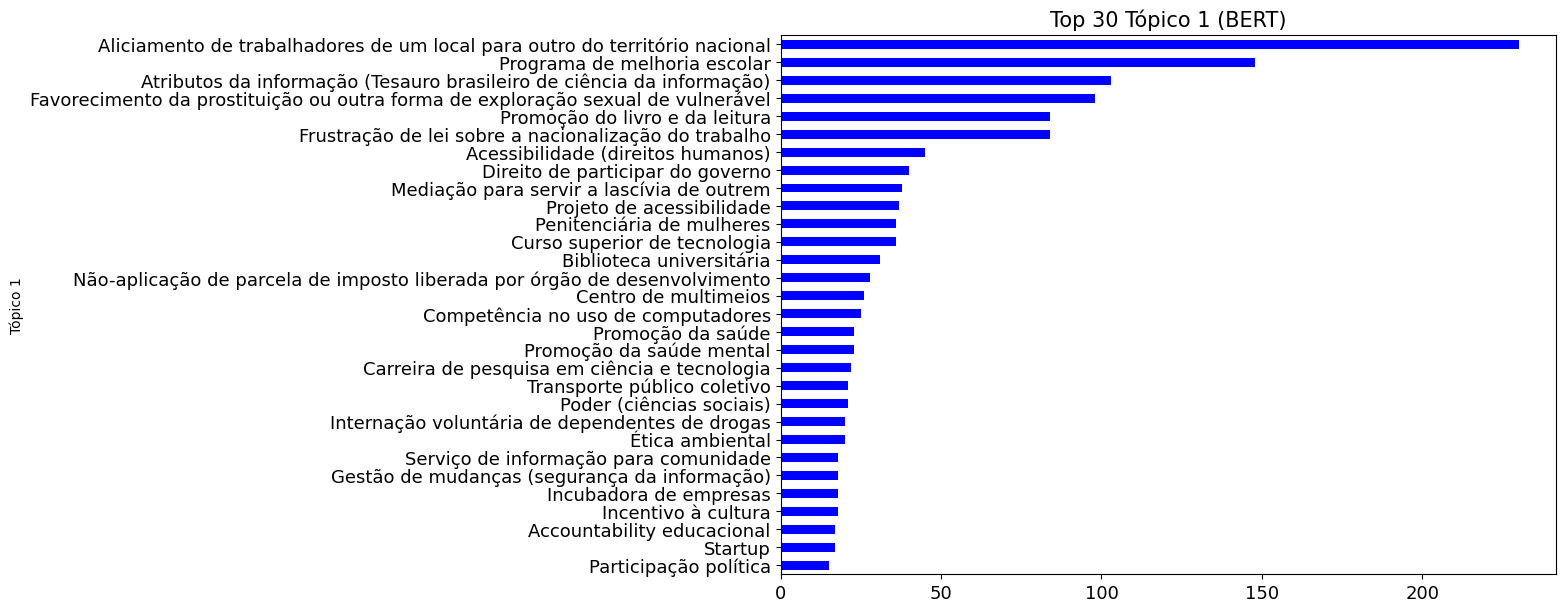

In [11]:
# Plotting the data with a title
ax = df_bert['Tópico 1'].value_counts(ascending=True).tail(30).plot(
    kind='barh', figsize=(10, 7), color='blue', fontsize=13)
ax.set_title('Top 30 Tópico 1 (BERT)', fontsize=15) # Adding a title to the plot
plt.show()

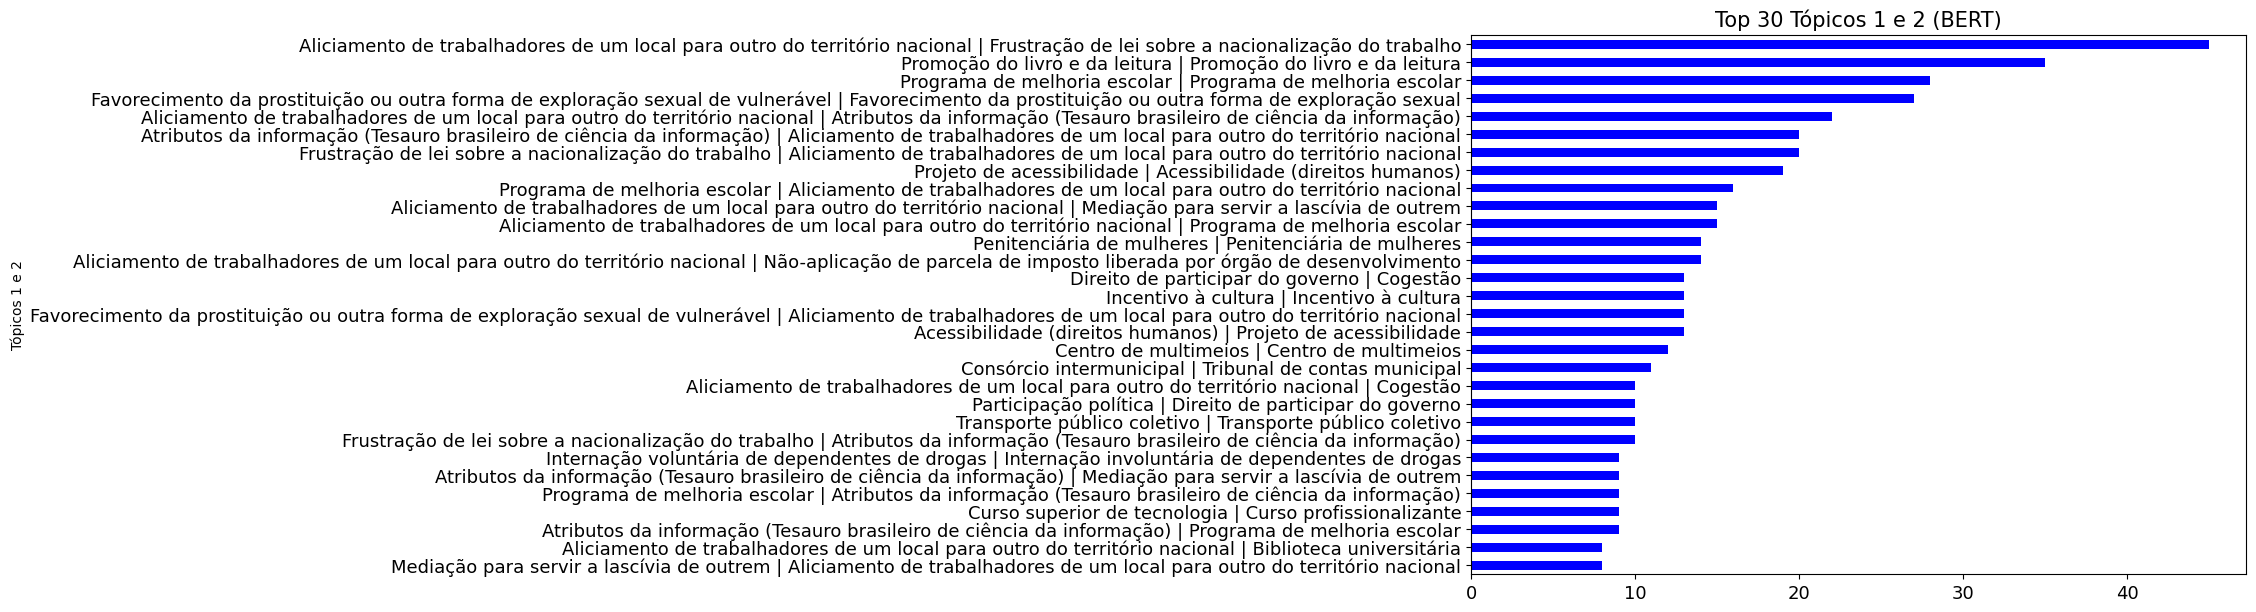

In [12]:
# Plotting the data with a title
ax = df_bert['Tópicos 1 e 2'].value_counts(ascending=True).tail(30).plot(
    kind='barh', figsize=(10, 7), color='blue', fontsize=13)
ax.set_title('Top 30 Tópicos 1 e 2 (BERT)', fontsize=15) # Adding a title to the plot
plt.show()

### Plots - TFIDF

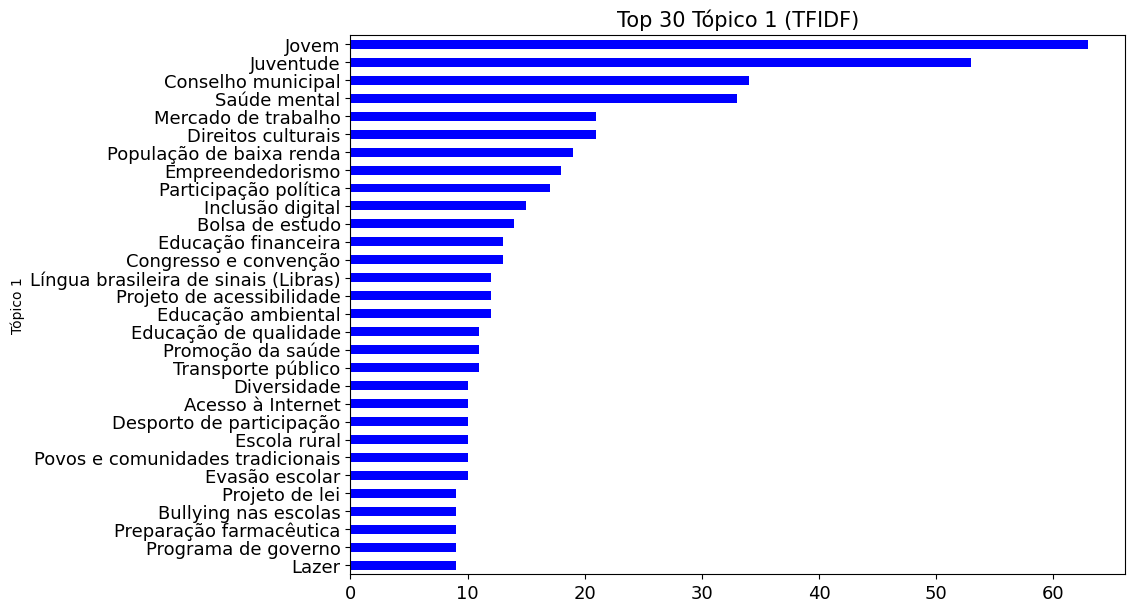

In [13]:
# Plotting the data with a title
ax = df_tfidf['Tópico 1'].value_counts(ascending=True).tail(30).plot(
    kind='barh', figsize=(10, 7), color='blue', fontsize=13)
ax.set_title('Top 30 Tópico 1 (TFIDF)', fontsize=15) # Adding a title to the plot
plt.show()

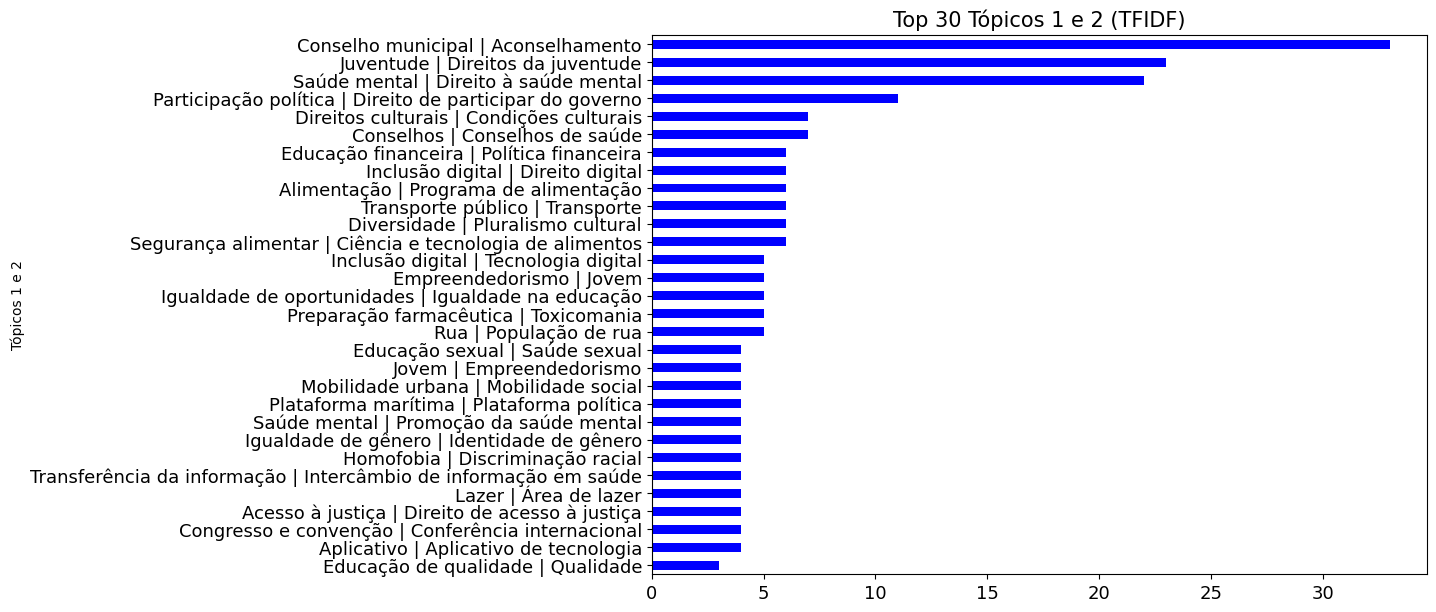

In [17]:
# Plotting the data with a title
ax = df_tfidf[df_tfidf['Tópico 1']!= df_tfidf['Tópico 2']]['Tópicos 1 e 2'].value_counts(ascending=True).tail(30).plot(
    kind='barh', figsize=(10, 7), color='blue', fontsize=13)
ax.set_title('Top 30 Tópicos 1 e 2 (TFIDF)', fontsize=15) # Adding a title to the plot
plt.show()